In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Advertising-2.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
df.shape

(200, 5)

In [31]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


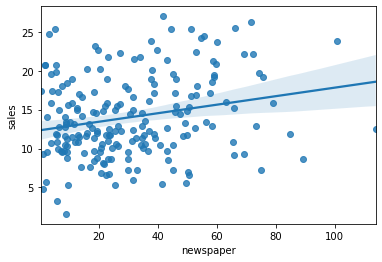

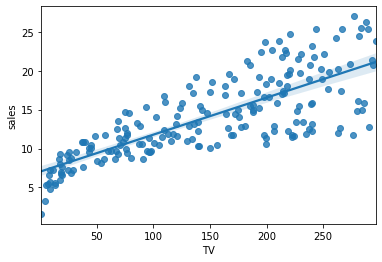

In [33]:
# Visualization of given Data
import seaborn as sns
sns.regplot(x='newspaper', y='sales', data=df)
plt.show()
sns.regplot(x='TV', y='sales', data=df)
plt.show()


<AxesSubplot:xlabel='TV', ylabel='sales'>

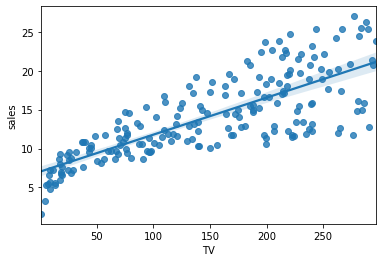

In [34]:
#Regression plot using sea born
sns.regplot(x='TV', y='sales', data=df)


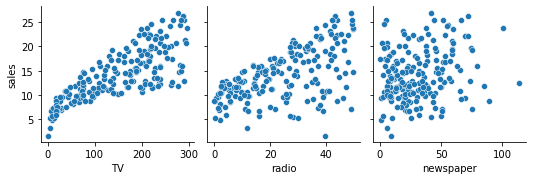

In [35]:
# Linearity
sns.pairplot(data=df,
            x_vars=['TV', 'radio', 'newspaper'],
            y_vars='sales')

In [36]:
# Getting X and Y values
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Splitting into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [37]:
# Training the Alogorithm
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [38]:
print("Intercept: ", mlr.intercept_)
print("Coefficients: ")
list(zip(X, mlr.coef_))

Intercept:  3.241969367214148
Coefficients: 


[(array([  1. , 230.1,  37.8,  69.2]), -0.0022218685083283964),
 (array([ 2. , 44.5, 39.3, 45.1]), 0.04453840313199059),
 (array([ 3. , 17.2, 45.9, 69.3]), 0.19625480234143203),
 (array([  4. , 151.5,  41.3,  58.5]), -0.0031907561074006113)]

In [39]:
# Actual Value and the Predicted Value
y_pred = regressor.predict(X_test)
output = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print("Actual Vs predicted: \n",output.head())

Actual Vs predicted: 
    Actual  Predicted
0    11.3  10.246644
1     8.4   7.306796
2     8.7   7.013130
3    25.4  24.062991
4    11.7  11.845386


In [40]:
# Model Evaluation
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Square Error: ",mse)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squar Error: ",r2)

Mean Absolute Error:  1.4158480868317496
Mean Square Error:  4.516487822219426
Root Mean Squar Error:  2.1252030072958736
